<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [38]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# TASK 1: Become familiar with the dataset

In [7]:
# Checking first 5 rows
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# Checking last 5 rows
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [9]:
# Summary
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
#Checking shape
boston_df.shape

(506, 14)

In [14]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


# Task 2: Generate Descriptive Statistics and Visualizations

## Provide boxplot for the "Median value of owner-occupied homes"

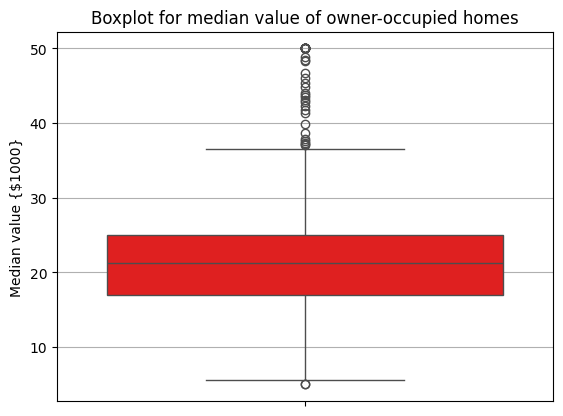

In [17]:
sns.boxplot(y=boston_df['MEDV'], color = 'red')
pyplot.title('Boxplot for median value of owner-occupied homes')
pyplot.ylabel("Median value {$1000}")
pyplot.grid(True, axis='y')
pyplot.show()

## Barplot for Charles river variable

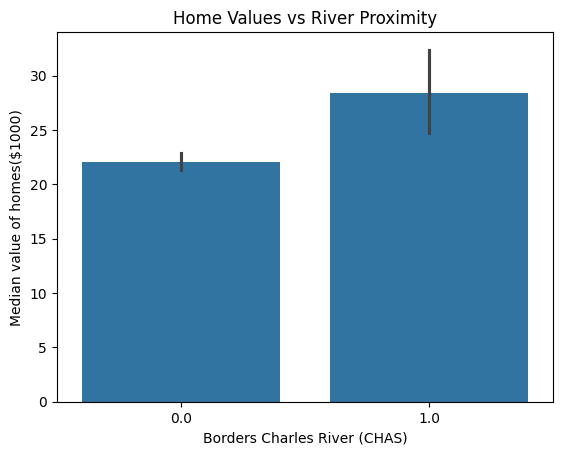

In [21]:
sns.barplot(data=boston_df, x="CHAS", y="MEDV")
pyplot.xlabel("Borders Charles River (CHAS)")
pyplot.ylabel("Median value of homes($1000)")
pyplot.title ("Home Values vs River Proximity")
pyplot.show()

##  Boxplot for the MEDV variable vs the AGE variable

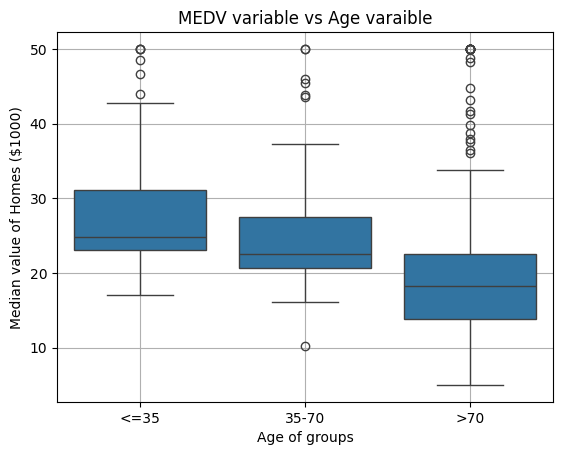

In [28]:
bins = [0,35,70, boston_df["AGE"].max()]
labels = ["<=35", "35-70", ">70"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, include_lowest = True)

sns.boxplot(x="AGE_GROUP", y="MEDV", data=boston_df)
pyplot.title('MEDV variable vs Age varaible')
pyplot.xlabel('Age of groups')
pyplot.ylabel('Median value of Homes ($1000)')
pyplot.grid(True)
pyplot.show()

## Scatter plot to show relationship between Nitric oxide conccentrations and the proportion of non-retail buisness acres per town

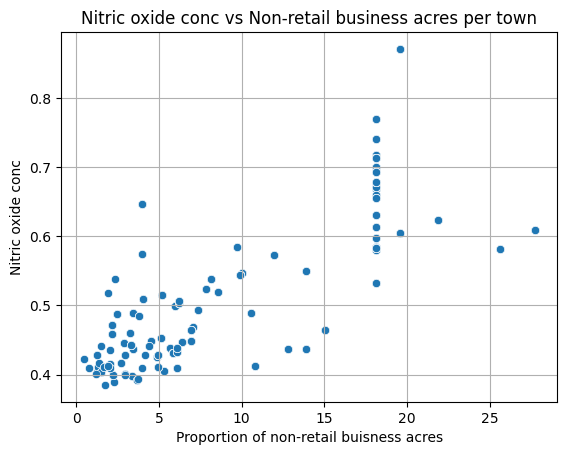

In [27]:
sns.scatterplot(x ='INDUS', y='NOX', data=boston_df)
pyplot.title('Nitric oxide conc vs Non-retail business acres per town')
pyplot.xlabel('Proportion of non-retail buisness acres')
pyplot.ylabel('Nitric oxide conc')
pyplot.grid(True)
pyplot.show()

## Histogram for the pupil to teacher ratio variable

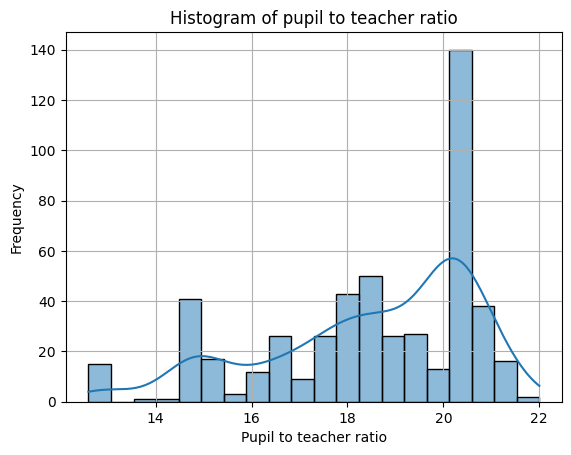

In [31]:
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
pyplot.title('Histogram of pupil to teacher ratio')
pyplot.xlabel('Pupil to teacher ratio')
pyplot.ylabel('Frequency')
pyplot.grid(True)
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [41]:
river_medv = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no_medv = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = ttest_ind(river_medv, river_no_medv, equal_var = False)
print(f"T-statistic: {t_stat:.5f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 3.11329
P-value: 0.00357


##### Null hypothesis: No significant difference in median value of houses bounded by Charles river

##### Alternative hypothesis: There is significant difference in median value of houses bounded by Charles river

##### p-value < alpha(0.05) --> Reject the null hypothesis

##### Conclusion: There is significant difference in median value of houses bounded by the Charles river

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [44]:
bins = [0,35,70, boston_df["AGE"].max()]
labels = ["<=35", "35-70", ">70"]
boston_df["AGE_GROUP"] = pd.cut(boston_df["AGE"], bins=bins, labels=labels, include_lowest = True)

groups = [boston_df.loc[boston_df["AGE_GROUP"] == lab, "MEDV"] for lab in labels]

F_stat, p_val = f_oneway(*groups)
print(f"SciPy one-way ANOVA: F = {F_stat:.3f}, p = {p_val:.3f}")

SciPy one-way ANOVA: F = 36.408, p = 0.000


##### Null hypothesis: No difference in median values of houses for each proportion of owner occupied units built prior to 1940

##### Alternative hypothesis: There is difference in median values of houses for each proportion of owner occupied units built prior to 1940

##### p-value < alpha (0.05) --> Reject null hypothesis

##### Conclusion: There is difference in median values of houses for each proportion of owner occupied units built prior to 1940

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [45]:
corr_coefficient, p_value = pearsonr(boston_df['INDUS'], boston_df['NOX'])

print(f"Perason Correlationn Coefficient: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

Perason Correlationn Coefficient: 0.7637
P-value: 0.0000


##### Null hypothesis: No linear relationship between Nitric oxide concentration and proportion of non-retail business acres per town

##### Alternative hypothesis: There is linear relationship between Nitric oxide concentration and proportion of non-retail business acres per town

##### p-value < alpha (0.05) --> Reject null hypothesis

##### Conclusion: There is linear relationship between Nitric oxide concentration and proportion of non-retail business acres per town

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [46]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 25 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        09:49:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0